In [1]:
# import libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
sns.set(style="darkgrid")

# stats
from scipy import stats
from sklearn import linear_model

# Table of Contents
- [Overview](#Overview)
- [Data-Preprocessing](#Preprocessing)
    - [Identify missing values](#Missing_data)
    - [Remove double postings](#remove_duplicates)
    - [Identify/Remove outliers](#outliers)
- [EDA](#EDA)
    - [Pairplot/Correlation](#pairplot)
    - [Location](#Location)
        - [Basemap](#basemap)
        - [Density Map with Folium](#Folium)
        - [Density Plot/Boxplot Price by Area](#density-boxplot-area)
    - [Square Footage](#square-feet)
        - [Scatterplot-SquareFeet x Price](#scatter-plot)
        - [LinearModels for Price by Area](#linear-models)
        - [Median Price Per Square Foot by Area](#Median-price)
    - [Bedrooms](#Bedrooms-area)
        - [Proportional Plot of Rooms By Area](#proportion)
    - [Miseallaneous](#misc)
        - [Pet Policy Affect on Price](#pet)
        - [Smoking Policy Affect on Price](#smoking)
    - [Conclusion](#conclusion)

<a name="Overview"></a>
## Overview

In this project I analyzed data from craiglsist apartment postings in the Bay Area. This data was scraped on March 2020 and contains data from up to 3 months prior. The goal of this analysis was to see which location in the Bay Area has the best price for apartments based on the features.

<a name="Preprocessing"></a>
## Data Pre-Processing

There was initial data cleaning performed on this dataset when it was scraped from Craigslist, but there are still some tidying up I want to do before my analysis. What I plan to do here is:
1. [Identify missing values](#Missing_data)
2. [Remove double postings](#remove_duplicates)
3. [Identify/Remove outliers](#outliers)

In [2]:
# read data
df1 = pd.read_csv('Craigslist.csv')

In [3]:
df1.head(10)

,Title,Price,Bedrooms,Bathrooms,Square_feet,Dog,Cat,Parking,Smoking,Time_posted,Longitude,Latitude,Area
0,$7500 / 4br - 2200ft2 - Prime Location Near Do...,7500.0,4.0,2.0,2200.0,No,No,NaN,no smoking,2020-03-02 18:03:00,-122.188886,37.451399,pen
1,$2195 / 1br - 950ft2 - YOUR DREAM HOME IS ABOU...,2195.0,1.0,1.0,950.0,No,Yes,NaN,no smoking,2020-03-02 18:03:00,-122.139221,37.686232,eby
2,$5375 / 3br - 1286ft2 - Stunning Views of the ...,5375.0,3.0,2.0,1286.0,Yes,Yes,NaN,smoking ok,2020-02-20 18:13:00,-122.274055,37.795558,eby
3,$3864 / 2br - 1149ft2 - Enjoy 2 Weeks FREE- Le...,3864.0,2.0,2.0,1149.0,Yes,Yes,NaN,no smoking,2020-03-02 17:27:00,-121.984400,37.348300,sby
4,$2400 / 1br - 550ft2 - Cozy 1 bed/1 bath in Co...,2400.0,1.0,1.0,550.0,No,No,NaN,no smoking,2020-03-02 18:02:00,-122.152399,37.460140,pen
5,$2800 / 2br - 1061ft2 - Courtyard Top Floor Tw...,2800.0,2.0,2.0,1061.0,Yes,Yes,NaN,no smoking,2020-03-02 18:02:00,-122.057397,37.901322,eby
6,"$4000 / 3br - 800ft2 - 3BR, 2BA: Spacious, Urb...",4000.0,3.0,2.0,800.0,No,No,street parking,no smoking,2020-03-02 17:54:00,-122.407001,37.795077,sfc
7,$6850 / 2br - 1300ft2 - Remodeled Home on Larg...,6850.0,2.0,2.5,1300.0,No,No,street parking,no smoking,2020-03-02 18:02:00,-122.145085,37.434029,pen
8,$2450 / 2br - 1000ft2 - ENJOY THE LUXURY OF TH...,2450.0,2.0,1.0,1000.0,No,Yes,NaN,no smoking,2020-03-02 18:02:00,-122.139221,37.686232,eby
9,$2705 / 1br - 770ft2 - 1-Bedroom with 2 Closet...,2705.0,1.0,1.0,770.0,Yes,Yes,NaN,no smoking,2020-03-02 18:02:00,-122.272470,37.762614,eby


In [4]:
# to see how much info and if data is in correct format
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        2999 non-null   object 
 1   Price        2993 non-null   float64
 2   Bedrooms     2903 non-null   float64
 3   Bathrooms    2903 non-null   float64
 4   Square_feet  2200 non-null   float64
 5   Dog          2999 non-null   object 
 6   Cat          2999 non-null   object 
 7   Parking      620 non-null    object 
 8   Smoking      2999 non-null   object 
 9   Time_posted  2998 non-null   object 
 10  Longitude    2983 non-null   float64
 11  Latitude     2983 non-null   float64
 12  Area         2999 non-null   object 
dtypes: float64(6), object(7)
memory usage: 304.7+ KB


In [5]:
# make time_posted correct format
df1['Time_posted'] = pd.to_datetime(df1['Time_posted'], format = '%Y-%m-%d %H:%M:%S')

In [6]:
# it is now in correct format
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Title        2999 non-null   object        
 1   Price        2993 non-null   float64       
 2   Bedrooms     2903 non-null   float64       
 3   Bathrooms    2903 non-null   float64       
 4   Square_feet  2200 non-null   float64       
 5   Dog          2999 non-null   object        
 6   Cat          2999 non-null   object        
 7   Parking      620 non-null    object        
 8   Smoking      2999 non-null   object        
 9   Time_posted  2998 non-null   datetime64[ns]
 10  Longitude    2983 non-null   float64       
 11  Latitude     2983 non-null   float64       
 12  Area         2999 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 304.7+ KB


<a name="Missing_data"></a>
### Identifying Missing Data

In [7]:
# missing data
(df1.isna().sum() / len(df1) * 100)

Title           0.000000
Price           0.200067
Bedrooms        3.201067
Bathrooms       3.201067
Square_feet    26.642214
Dog             0.000000
Cat             0.000000
Parking        79.326442
Smoking         0.000000
Time_posted     0.033344
Longitude       0.533511
Latitude        0.533511
Area            0.000000
dtype: float64

Alot of missing data from the parking column and there is a quarter of missing values in square feet column. The rest of the columns have very little missing values.

<a name="remove_duplicates"></a>
### Removing Duplicate Postings

There is usually quite a few number of postings on craiglist that are spammed. They may contain some real postings so we will keep 1 for each posting. I will use drop_duplicates, but keep the first occurence.

In [8]:
# there are 163 duplicate titles in the dataset. Sometimes there are postings that are spammed would like to keep one occurence.
len(df1) - df1['Title'].nunique()

163

We have 163 duplicate rows in our data. Craiglist usually has spamming so I would like to remove the duplicates, but keep one of each.

In [9]:
df1 = df1.drop_duplicates(subset = 'Title', keep = 'first')

In [10]:
len(df1) - df1['Title'].nunique()

0

<a name="outliers"></a>
### Identifying/Removing Price Outliers

We want data that is representative of regular apartment postings in the Bay Area thus we need to identify and remove outliers that will mess with our analysis.

In [11]:
# Lets first try to understand our independent variables
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,2830.0,3057.065018,2075.720858,68.0000,2195.000000,2730.000000,3495.0000,60578.000000
Bedrooms,2744.0,1.591472,0.907103,0.0000,1.000000,2.000000,2.0000,6.000000
Bathrooms,2744.0,1.366800,0.588524,0.0000,1.000000,1.000000,2.0000,5.500000
Square_feet,2079.0,943.055796,444.819081,100.0000,681.000000,850.000000,1080.0000,5000.000000
Longitude,2825.0,-122.218078,0.858123,-159.3954,-122.415569,-122.230720,-121.9844,-116.543537
Latitude,2825.0,37.693568,0.514934,22.2073,37.406240,37.760428,37.8471,39.244100


From the summary statistics above we can see that there are some places that may be very large compared to the average housing available. For example our max for our price variable is about \\$60,000. There are also very small prices such as $68 for our min price. We need to examine these prices because they may not represent the average housing in the Bay Area. Some causes for this may be typos or spam postings.


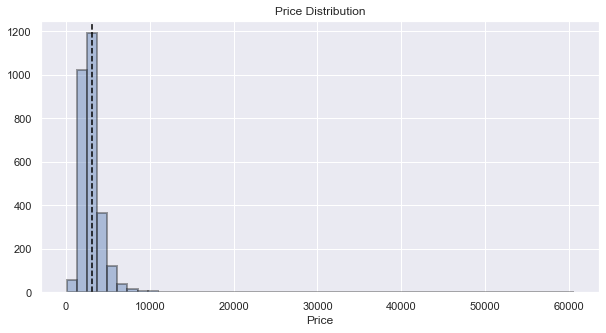

In [12]:
# plot price distributions
plt.subplots(figsize = (10,5))
g = sns.distplot(df1[df1['Price'].notnull()]['Price'], hist_kws=dict(edgecolor="k", linewidth=2), bins = 50, kde = False)
plt.axvline(x = df1[df1['Price'].notnull()]['Price'].mean(), color = 'black', linestyle = 'dashed')
g.set_title('Price Distribution')
plt.show()

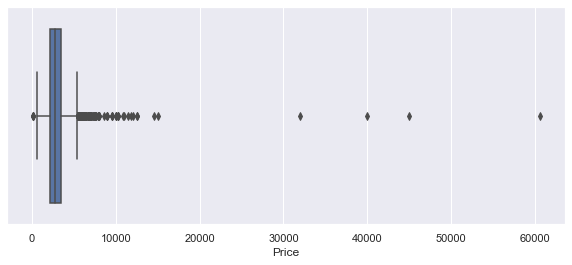

In [13]:
# boxplot of price
plt.subplots(figsize=(10,4))
sns.boxplot(df1['Price'])

The plot above shows a skewed distribution. This shows that there are a number of postings that are above \$10000. Were going to explore these outliers and see if they represent our data well. First we need to find which postings are outliers. We will use the formula below. We will consider outliers those postings that have a Z-score of less than -3 or greater than 3.

<img src = "Outlierimg.png"/>

In [14]:
# z scores for outlier detection
# remove outliers above 3
z = np.abs(stats.zscore(df1['Price'], nan_policy = 'omit'))

In [15]:
# the post where price is an outlier, not representative of average housing pricing
df1[(z > 3)]

<ipython-input-15-f007b71c1e1d>:2: RuntimeWarning: invalid value encountered in greater
  df1[(z > 3)]


,Title,Price,Bedrooms,Bathrooms,Square_feet,Dog,Cat,Parking,Smoking,Time_posted,Longitude,Latitude,Area
136,$11999 / 3br - 1750ft2 - Two-story luxury pent...,11999.0,3.0,2.5,1750.0,Yes,Yes,NaN,smoking ok,2020-03-02 17:39:00,-122.410011,37.803833,sfc
320,$9500 / 2br - 1456ft2 - Furnished Four Seasons...,9500.0,2.0,2.5,1456.0,No,No,no parking,no smoking,2020-02-14 15:51:00,-122.404938,37.786445,sfc
330,$14600 / 2br - 2230ft2 - Millennium Tower Stun...,14600.0,2.0,3.0,2230.0,No,No,NaN,smoking ok,2020-02-18 15:41:00,-122.389200,37.786400,sfc
331,$11500 / 2br - 1953ft2 - Furnished Millennium ...,11500.0,2.0,2.0,1953.0,No,No,NaN,smoking ok,2020-02-24 14:54:00,-122.389200,37.786400,sfc
527,$9500 / 3br - 3250ft2 - Beautiful 3bed/3.5bath...,9500.0,3.0,3.5,3250.0,No,No,NaN,no smoking,2020-03-02 16:16:00,-122.208871,37.425537,pen
673,$9500 / 3br - Russian Hill | 2123 Hyde Street ...,9500.0,3.0,3.0,NaN,Yes,Yes,NaN,no smoking,2020-03-02 16:40:00,-122.419276,37.800342,sfc
824,$45000 / 4br - 4700ft2 - Potrero Hill 5-Level ...,45000.0,4.0,5.0,4700.0,Yes,Yes,NaN,smoking ok,2020-03-02 16:20:00,-122.397100,37.762100,sfc
835,$10000 / 5br - 4500ft2 - Fabulous and Grand Pi...,10000.0,5.0,0.0,4500.0,Yes,Yes,NaN,smoking ok,2020-03-02 16:20:00,-122.214589,37.818266,eby
847,$12500 / 3br - 3999ft2 - Pacific Heights Victo...,12500.0,3.0,3.0,3999.0,Yes,Yes,NaN,smoking ok,2020-03-02 16:19:00,-122.438660,37.787714,sfc
1335,$60578 / 3br - 1498ft2 - Modern Living Hillsda...,60578.0,3.0,2.0,1498.0,Yes,Yes,NaN,no smoking,2020-03-02 15:27:00,-122.299800,37.539500,pen


It looks like alot of these prices that are outliers on the higher side are houses and not apartments thus we will remove them for that reason and because they skew our data.

In [16]:
# our dataframe removing outliers
df1 = df1[(z < 3)]

<ipython-input-16-718d445ecf20>:2: RuntimeWarning: invalid value encountered in less
  df1 = df1[(z < 3)]


In [17]:
# prices under 200 are unbelievable prices and might be mistakes
df1[df1['Price'] < 200]

,Title,Price,Bedrooms,Bathrooms,Square_feet,Dog,Cat,Parking,Smoking,Time_posted,Longitude,Latitude,Area
1441,$88 / 1br - FURNISHED ONE BEDROOM APARTMENT IN...,88.0,1.0,1.0,NaN,No,Yes,NaN,no smoking,2020-02-16 00:12:00,-122.212400,38.098500,eby
1442,$68 FURNISHED STUDIO APARTMENT INCLUDE ALL UTI...,68.0,NaN,NaN,NaN,No,Yes,NaN,smoking ok,2020-02-03 18:28:00,-122.212400,38.098500,eby
1444,$75 / 1br - FURNISHED STUDIO APARTMENT INCLUDE...,75.0,1.0,1.0,NaN,No,Yes,NaN,no smoking,2020-02-18 12:24:00,-122.212400,38.098500,eby
1766,$105 / 2br - 2BR Apartment at the Golden Gate ...,105.0,2.0,1.0,NaN,No,No,NaN,smoking ok,2020-03-02 14:36:00,-122.453442,37.769215,sfc


As we can also see here with prices lower than 200 we can see that once the price is lower than this the postings stop making sense.

In [18]:
# removing outliers with low prices
rm_indx = df1[(df1['Price'] < 200)].index
df1.drop(rm_indx, inplace = True)

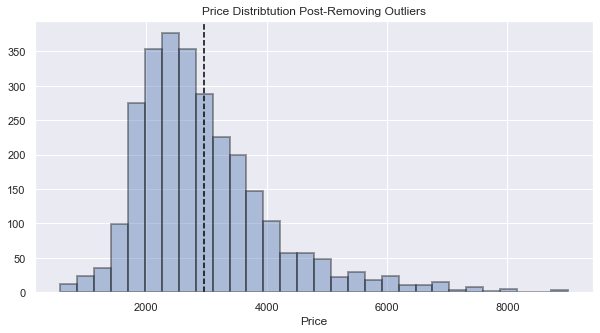

In [19]:
# plot new distributions with price outliers removed
plt.subplots(figsize = (10,5))
g = sns.distplot(df1[df1['Price'].notnull()]['Price'], hist_kws=dict(edgecolor="k", linewidth=2), bins = 30, kde = False)
plt.axvline(x = df1[df1['Price'].notnull()]['Price'].mean(), color = 'black', linestyle = 'dashed')
g.set_title('Price Distribtution Post-Removing Outliers')
plt.show()

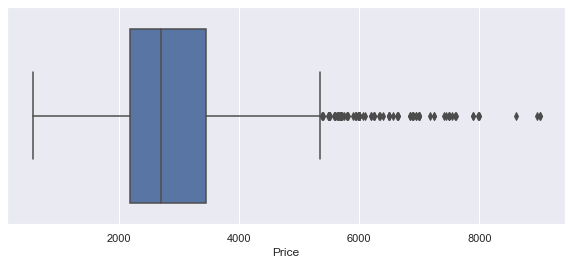

In [20]:
# boxplot of price post removing outliers
plt.subplots(figsize=(10,4))
sns.boxplot(df1['Price'])

This looks better than the highly skewed distribution we had before. 

## EDA

Here we explore our data of aparments and we try to answer some questions for example:
* How does location affect price?
* How does square footage affect price?
* Which location has better price per square footage?
* Which location tends to have more rooms? (Bigger Families)
* Do the other variables affect price?

<a name="pairplot"></a>
### Pairplot

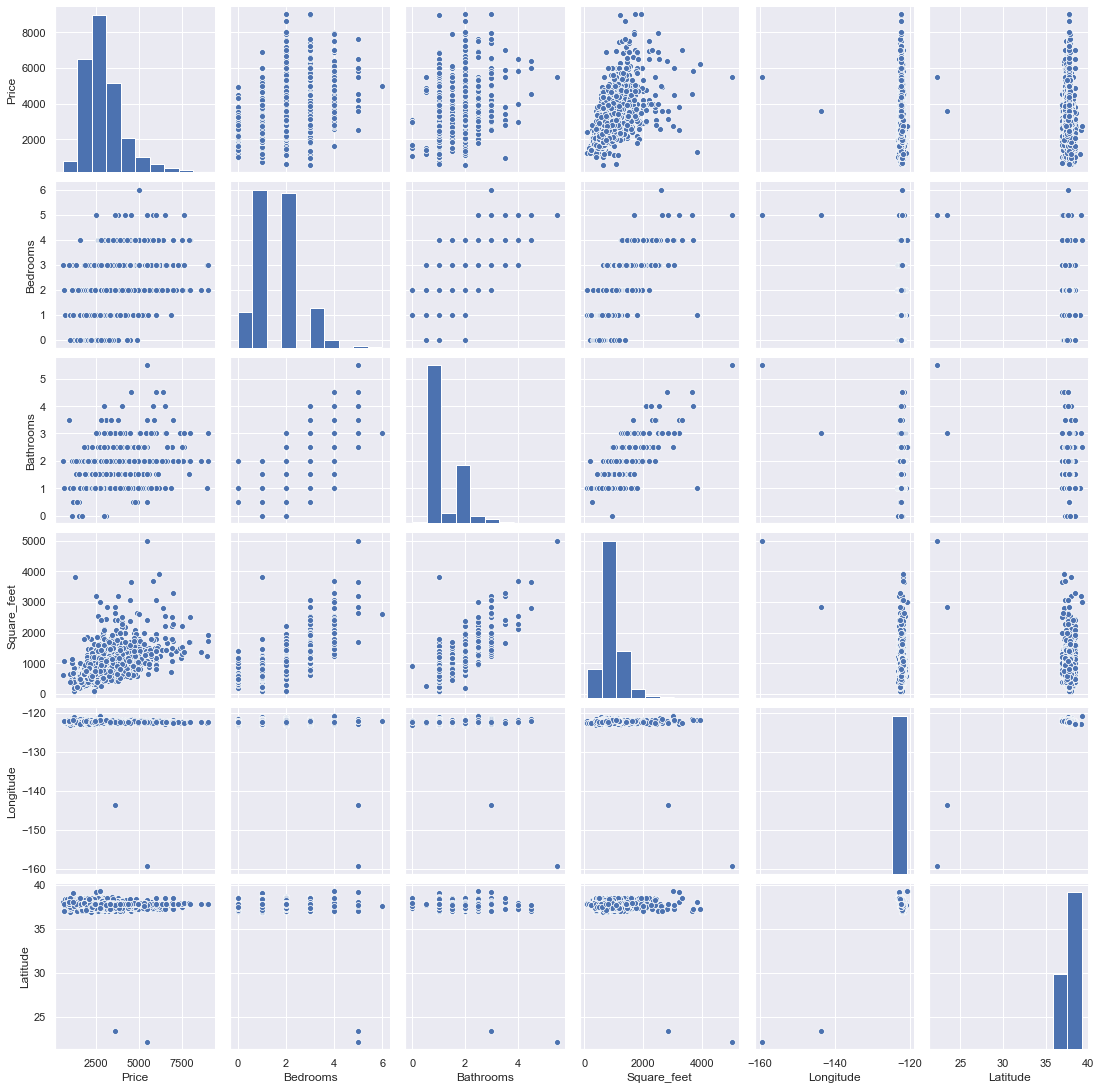

In [21]:
### pairplot
sns.pairplot(df1)

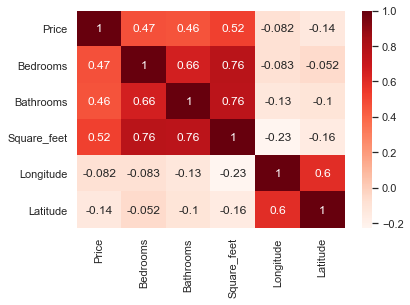

In [22]:
# correlation
correlations = df1.corr()
sns.heatmap(correlations, annot = True, cmap = 'Reds')

We can see that there is some sort of relationship between price and Bathroom, Bedroom, and Square Feet. The correlations show that these three variables have a positive linear relationship. We can also see that bathrooms & bedrooms have a high correlation with square footage, which is expected since as there are more number of bedrooms and bathrooms than square footage will increase.

<a name="Location"></a>
## Location

In [23]:
# Which areas
print(df1['Area'].unique())

['pen' 'eby' 'sby' 'sfc' 'nby' 'scz']


In this dataset we have 6 different areas which are the Pensinsula, East Bay, South Bay, San Francisco City, North Bay, and Santa Cruz.

Text(0.5, 1.0, 'Number of Postings in Dataset by Area')

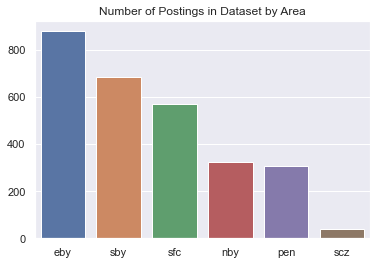

In [24]:
# Number of postings in our areas
num_Area_post = df1['Area'].value_counts()
sns.barplot(num_Area_post.index, num_Area_post.values)
plt.title('Number of Postings in Dataset by Area')

The majority of our posts are from the East Bay, South Bay, and San Francisco city. There are also very minimal post from Santa Cruz.

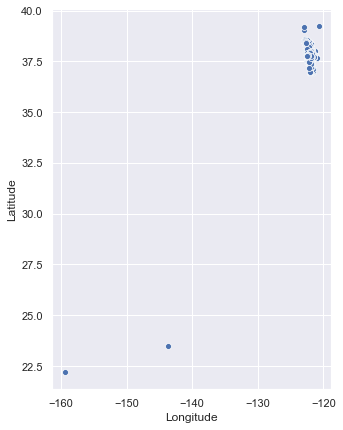

In [25]:
# quick scatterplot of latitude and longitude
plt.subplots(figsize=(5,7))
sns.scatterplot(x = 'Longitude', y = 'Latitude', data=df1)

There are two instances postings that have coordinates far from the other locations that may not be the Bay Area. We need to look at these to see if they are an error or if their truly from some other location.

In [26]:
# postings with different coordinates
# one is from kauai and the other is from pittsburg
df1[df1['Latitude'] < 35.0]['Title']

349     $3600 / 5br - 2820ft2 - House for rent (pittsb...
1401    $5500 / 5br - 5000ft2 - Kauai Country Estate (...
Name: Title, dtype: object

In [27]:
# postings with high latitudes then average
df1[df1['Latitude'] > 39.0]['Title']

1404    $1180 / 1br - Lakeport Studio Apartment (lake ...
2417    $2500 / 5br - 3200ft2 - 5+ bed 3 bath house fo...
2593       $2750 / 4br - 3000ft2 - Home for Lease (Alta) 
Name: Title, dtype: object

In [28]:
# drop columns
df1 = df1.drop(df1[(df1['Latitude'] < 35.0) | (df1['Latitude'] > 39.0)]['Title'].index)

In [29]:
# reset index
df1 = df1.reset_index(drop=True)

<a name="basemap"></a>
### Basemap

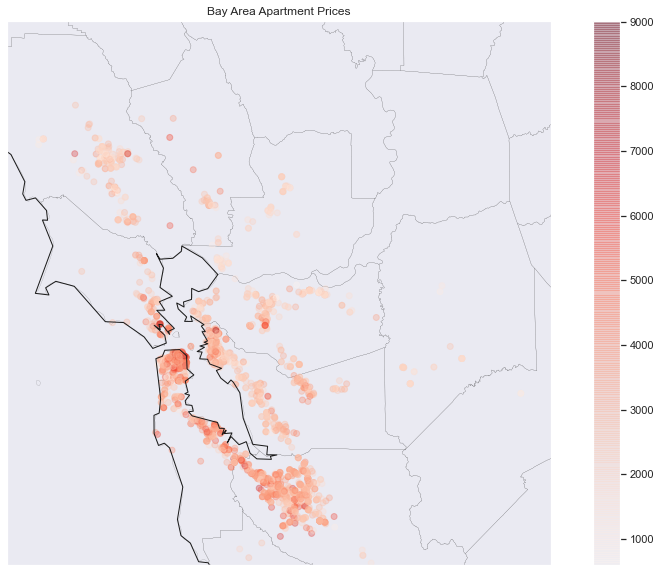

In [30]:
from mpl_toolkits.basemap import Basemap

###############################################
#https://zapcircle.net/geomapping-with-python/#
###############################################

#initiate the figure with it's size
fig = plt.figure(figsize = (15, 10))

#initialize the basemap
m = Basemap(projection = 'lcc',
            resolution='i',
            lon_1 = -123.5,
            lon_2 = -120.5,
            lat_0 = 38.0,
            lon_0 = -122,
            width=200000,
            height=200000)

m.drawcounties()
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# plot points
m.scatter(df1['Longitude'].values,
          df1['Latitude'].values,
          latlon = True,
          c = df1['Price'].tolist(),
          cmap = 'Reds',
          alpha = 0.3)

plt.colorbar()
plt.title('Bay Area Apartment Prices')
plt.show()

From this map we can alreaady tell which areas are more expensive. It seems that San Francisco, Pensinsula, and San Jose seem to have higher prices.

<a name="Folium"></a>
### Density Map with Folium

In [31]:
###########################################################
#https://alcidanalytics.com/p/geographic-heatmap-in-python#
###########################################################

import folium
from folium.plugins import HeatMap

fig = plt.figure(figsize = (8, 8))

# copy of dataset
df_heatmap = df1.copy()

# drop na rows for longitude and latitude
df_heatmap = df_heatmap.dropna(subset=['Longitude', 'Latitude'])

max_amount = float(df_heatmap['Price'].max())

#initialize the Basemap
hmap = folium.Map(location=[38, -122], zoom_start=8, )
HeatMap(list(zip(df_heatmap['Latitude'].values, df_heatmap['Longitude'].values, df_heatmap['Price'].values)),
                min_opacity=0.25,
                radius=22, 
                max_zoom=1,
                blur = 18
                 ).add_to(hmap)
hmap

<Figure size 576x576 with 0 Axes>

From the maps above we can already see which areas in our dataset have higher apartment prices. San Francisco followed by San Jose seem to be the most expensive areas. 

<a name="density-boxplot-area"></a>
### Density Plot/Boxplot of Price by Area

Text(0.5, 1.0, 'Price Density by Area')

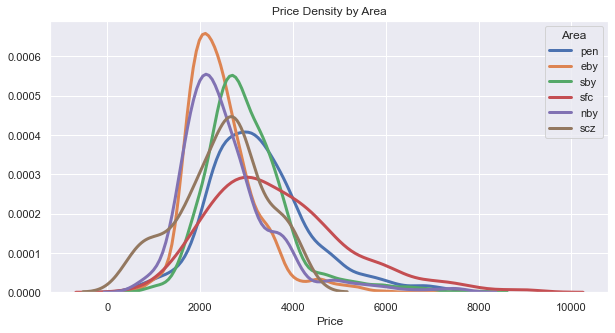

In [32]:
plt.subplots(figsize = (10,5))
Areas = df1['Area'].unique()

for area in Areas:
    subset = df1[df1['Area'] == area]
    
    sns.distplot(subset['Price'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = area)
plt.legend(title = 'Area')
plt.title('Price Density by Area')

Text(0.5, 1.0, 'Boxplot of Price by Area')

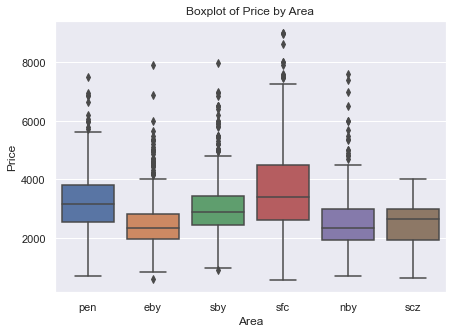

In [33]:
# boxplot for area prices
plt.subplots(figsize=(7,5))
sns.boxplot(x = 'Area', y = 'Price', data=df1)
plt.title('Boxplot of Price by Area')

As we can see from the boxplot above the overall price for San Francisco City, Peninsula, and South Bay seem to be higher than other places.

<a name="square-feet"></a>
## Square Footage

Since we know that price goes up the more square feet there are we would like to see if we can determine by how much price is increased for each square foot.

<a name="scatter-plot"></a>
### Scatterplot - SquareFeet x Price

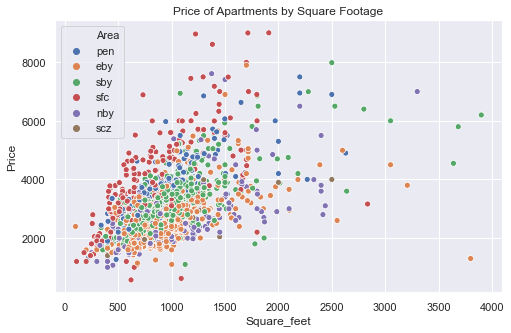

In [34]:
# square footage x price scatterplot
plt.subplots(figsize=(8,5))
g = sns.scatterplot(x = 'Square_feet', y = 'Price', hue = 'Area', data=df1)
g.set_title('Price of Apartments by Square Footage')
plt.show()

By plotting square footage with price for different areas on the same plot we can already tell that sfc and pen have larger prices for same square footage than other areas.

<a name="linear-models"></a>
### Linear Models for Price by Area

In [35]:
# make mask to remove nan values
mask = ~np.isnan(df1['Square_feet']) & ~np.isnan(df1['Price'])
df_mask = df1[mask]

In [36]:
### Function to return values of linear regression for each area
def linRegLine(area):
    subset = df_mask[df_mask['Area'] == area] # subset by area
       
    # assign values to X, y   
    X, y = subset['Square_feet'].values.reshape(-1,1), subset['Price'].values.reshape(-1,1)
    r = stats.pearsonr(subset['Square_feet'], subset['Price'])
    
    # fit model regression line to X,y
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    return regr.coef_[0][0],regr.intercept_[0], r[0]

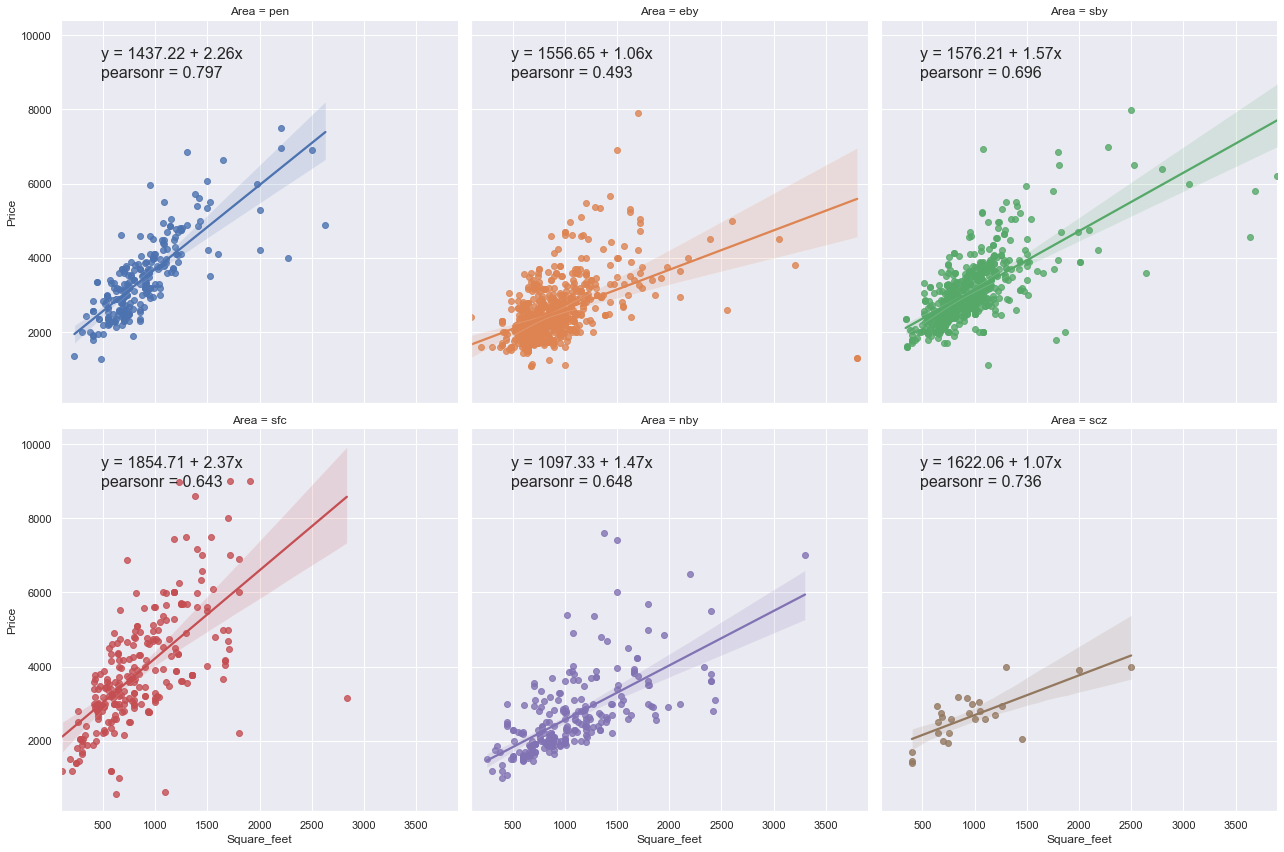

In [37]:
# linear scatterplots for each area
col_order = df_mask['Area'].unique().tolist() # list of column order

# graph the linear regression lines
g = sns.lmplot(x = 'Square_feet', y = 'Price', col = 'Area',
              data = df1, col_wrap = 3, height = 6,
              hue = 'Area', col_order = col_order)

# add regression line formula, and pearson r
for ax, area in zip(g.axes, col_order):
        coef, intercept, r = linRegLine(area) # call function to get coef & intercept for text
        textstr = 'y = {0} + {1}x'.format(round(intercept,2), round(coef,2))
        ax.text(0.1, 0.9, textstr, transform=ax.transAxes, fontsize=16) #add text
        ax.text(0.1, 0.85, 'pearsonr = {0}'.format(round(r,3)), transform=ax.transAxes, fontsize=16)

Plotting square footage against price for each area we can and drawing a linear model line we can make some predictions of what each size apartment might cost in each area. For example:

Assuming x = 1000 square feet. An apartment that is 1000 square feet will cost:
- \\$3697 on average in Peninsula
- \\$4224 on average in San Francisco City
- \\$2616 on average in East Bay
- \\$2567 on average in North Bay
- \\$3146 on average in South Bay
- \\$2692 on average in Santa Cruz

In [38]:
df_mask = df_mask.assign(PricePerFoot = df_mask['Price'] / df_mask['Square_feet'])

In [39]:
df_mask

,Title,Price,Bedrooms,Bathrooms,Square_feet,Dog,Cat,Parking,Smoking,Time_posted,Longitude,Latitude,Area,PricePerFoot
0,$7500 / 4br - 2200ft2 - Prime Location Near Do...,7500.0,4.0,2.0,2200.0,No,No,NaN,no smoking,2020-03-02 18:03:00,-122.188886,37.451399,pen,3.409091
1,$2195 / 1br - 950ft2 - YOUR DREAM HOME IS ABOU...,2195.0,1.0,1.0,950.0,No,Yes,NaN,no smoking,2020-03-02 18:03:00,-122.139221,37.686232,eby,2.310526
2,$5375 / 3br - 1286ft2 - Stunning Views of the ...,5375.0,3.0,2.0,1286.0,Yes,Yes,NaN,smoking ok,2020-02-20 18:13:00,-122.274055,37.795558,eby,4.179627
3,$3864 / 2br - 1149ft2 - Enjoy 2 Weeks FREE- Le...,3864.0,2.0,2.0,1149.0,Yes,Yes,NaN,no smoking,2020-03-02 17:27:00,-121.984400,37.348300,sby,3.362924
4,$2400 / 1br - 550ft2 - Cozy 1 bed/1 bath in Co...,2400.0,1.0,1.0,550.0,No,No,NaN,no smoking,2020-03-02 18:02:00,-122.152399,37.460140,pen,4.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,$2200 / 500ft2 - AVAILABLE NOW!! Large West El...,2200.0,0.0,1.0,500.0,No,No,street parking,no smoking,2020-02-24 19:23:00,-122.235281,37.479635,pen,4.400000
2792,$2300 / 1br - 600ft2 - AVAILABLE NOW!! Remodel...,2300.0,1.0,1.0,600.0,No,No,NaN,no smoking,2020-02-24 19:47:00,-122.213277,37.473138,pen,3.833333
2793,$3085 / 2br - 1069ft2 - Top Floor! Washer/Drye...,3085.0,2.0,2.0,1069.0,Yes,Yes,NaN,no smoking,2020-03-02 12:18:00,-121.855438,37.668902,eby,2.885875
2795,$2441 / 2br - 750ft2 - Best Prices Of The Seas...,2441.0,2.0,1.0,750.0,No,No,NaN,smoking ok,2020-03-02 12:18:00,-121.952200,37.756200,eby,3.254667


<a name="Median-price"></a>
###  Median Price per Square Foot By Area

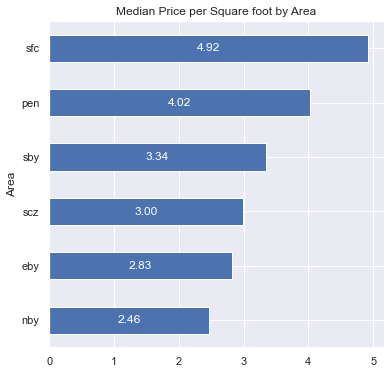

In [40]:
# median price per square foot by area
g = df_mask.groupby('Area')['PricePerFoot'].median().sort_values(ascending = True).plot(kind = 'barh', figsize = (6,6))
g.set_title('Median Price per Square foot by Area')

for p in g.patches:
    width, height = p.get_width(), p.get_height()
    #if (height < 2):
    #    continue
    x, y = p.get_xy() 
    g.text(x+width/2, 
            y+height/2, 
            '{:.2f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center',
            color = 'white')

Along with our plots above we can conclude that the most expensive places per square foot are San Francisco City, Peninsula, and the South Bay. The best prices per square feet are in the North Bay and East Bay. We will continue by looking at what places have the most number of rooms. The more rooms there are the bigger the apartments will be.

<a name="Bedrooms-area"></a>
## Number of Bedrooms in Areas

Text(0.5, 1.0, 'Stacked Plot of Number of Rooms by Area')

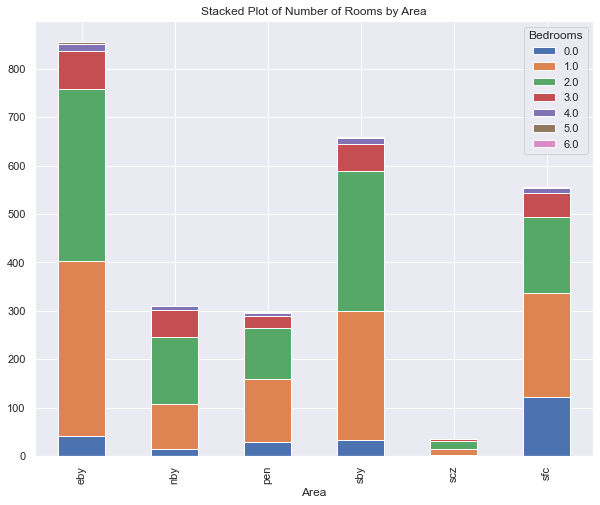

In [41]:
### Number of rooms in each area.? More suitable for families?
area_bedrooms = df1.groupby(['Area','Bedrooms']).size().reset_index().pivot(columns = 'Bedrooms', index = 'Area', values = 0)
g = area_bedrooms.plot(kind='bar', stacked=True, figsize=(10,8))
g.set_title('Stacked Plot of Number of Rooms by Area')

This graph looks like our countplot that counted the number of postings for each area, but shows the number of postings for each area. While this is ok we can see these number proportional to see if it shows us more.

<a name = "proportion"></a>
### Proportional Plot of Number of Rooms

In [42]:
# group area and bedrooms to count and be able to use proportions
area_bedrooms = df1.groupby(['Area','Bedrooms']).size().reset_index().pivot(columns = 'Bedrooms', index = 'Area', values = 0)

In [43]:
# sum of the rooms by index 
sum_rooms = area_bedrooms.sum(axis=1)

# use same index to divide area total rooms to get proportions
for area in area_bedrooms.index:
    area_bedrooms.loc[area] = round(area_bedrooms.loc[area] / sum_rooms.loc[area] * 100, 2)

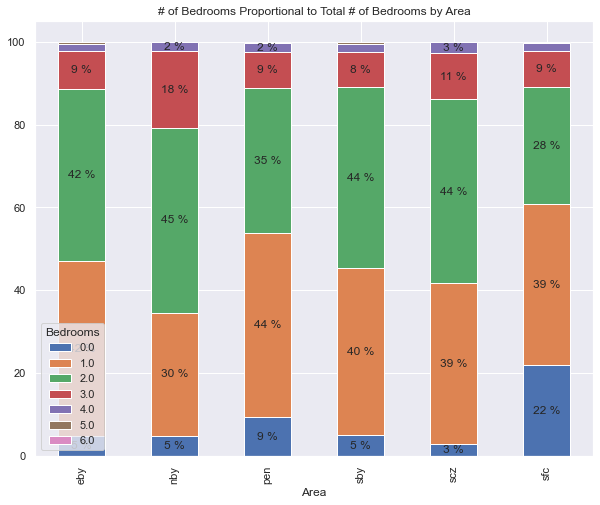

In [44]:
# stacked plot by proportions
ax = area_bedrooms.plot(kind='bar', stacked=True, figsize=(10,8))
ax.set_title('# of Bedrooms Proportional to Total # of Bedrooms by Area')

# annotate graph skipping less than 2%
### https://stackoverflow.com/questions/50160788/annotate-stacked-barplot-matplotlib-and-pandas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if (height < 2):
        continue
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

Made two plots to show number of bedrooms one is proportional to the area the other is a stacked plot. All areas have proportionally higher number of 1 & 2 bedrooms housing. This is most likely to accomadate families. But we can see that SFC contains a higher proportion of no bedroom housing than any other area, it contains 61% of housing with 1 or less rooms. This means that alot of studio apartments are available in this area. The best area for families is the northbay which contains 65% of housing with 2 or more rooms.

<a name="misc"></a>
## Miseallaneous

- How does pet policy affect price?
- How does it affect price in different areas?
- How does smoking policy affect price?
- How does parking affect price?

Quick reminder that we have about 80% missing data from our parking lot column. And we have no missing data from our Pet Policies and Smoking policies columns because we determined that if it weren't specified in the posting that smoking wasn't allowed or dog/cats weren't allowed than we just assumed they were allowed.

<a name="pet"></a>
### Affect of Pet Policy on Price

In [45]:
# initialize list
pets_allowed = []

for i in range(len(df1)):
    if (df1['Dog'][i] == 'Yes') & (df1['Cat'][i] == 'Yes'):
        pets_allowed.append('Both')
    elif (df1['Dog'][i] == 'No') & (df1['Cat'][i] == 'No'):
        pets_allowed.append('No Pets')
    elif (df1['Dog'][i] == 'Yes') & (df1['Cat'][i] == 'No'):
        pets_allowed.append('Dogs Allowed')
    elif (df1['Dog'][i] == 'No') & (df1['Cat'][i] == 'Yes'):
        pets_allowed.append('Cats Allowed')
    else:
        break

In [46]:
# insert new column
df1['Pet_policy'] = pets_allowed

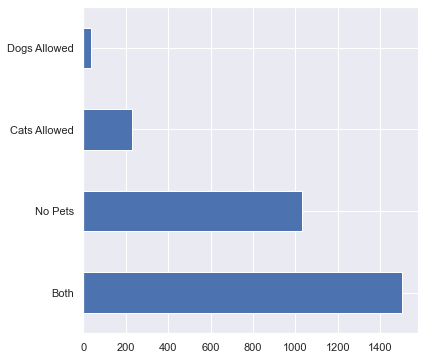

In [47]:
# the numer of type
df1['Pet_policy'].value_counts().plot(kind = 'barh', figsize = (6,6))

As we can see here there is a high number of both postings since that was the default if there was no specifications. The second highest was No pets where they specifically state no pets. And small number of places states Dogs or Cats allowed.

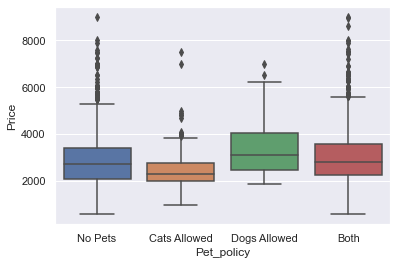

In [48]:
# box of pet policy overall
sns.boxplot(x= 'Pet_policy', y = 'Price', data = df1, order = ['No Pets', 'Cats Allowed', 'Dogs Allowed', 'Both'])

With the above in mind we see that Both has a lower price on average than Dogs allowed and about the same as No Pets. Again this might be because of the way that the data was collected. What we can conclude is that places that allow dogs are higher priced than Cats only. 

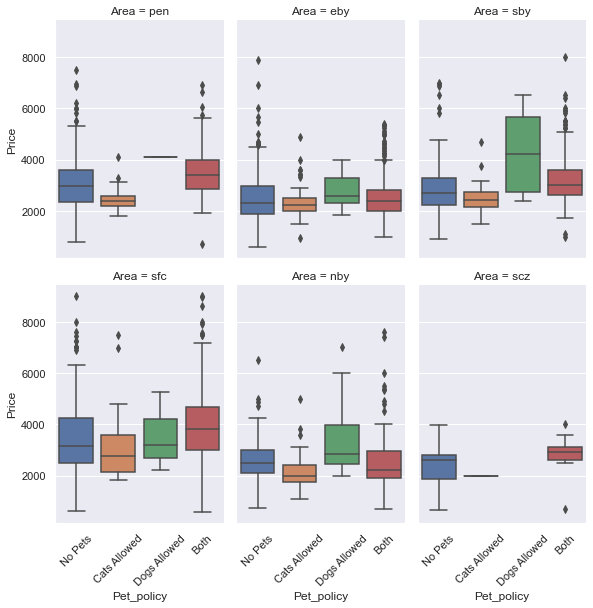

In [49]:
# Price comparing pet_policy
g = sns.catplot(x = 'Pet_policy', y = 'Price',
            kind = 'box',
            data = df1,
            col = 'Area',
            col_wrap = 3,
            aspect = .7,
            height = 4, 
            order = ['No Pets', 'Cats Allowed', 'Dogs Allowed', 'Both'])
g.set_xticklabels(rotation = 45)

There really doesn't seem to be a big trend going on with pet policy besides that places that allow dogs are pricier than those who only allow cats. And No Pets seems to be a higher priced than alot of the other categories, but that may be the way this data was collected.

<a name="smoking"></a>
### Affect of Smoking Policy on Price

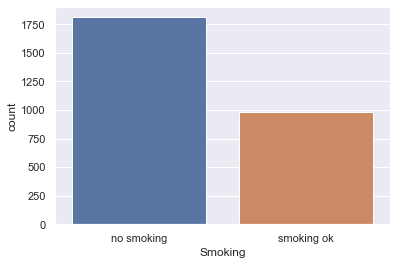

In [50]:
# countplot smoking
sns.countplot(x='Smoking', data =df1)

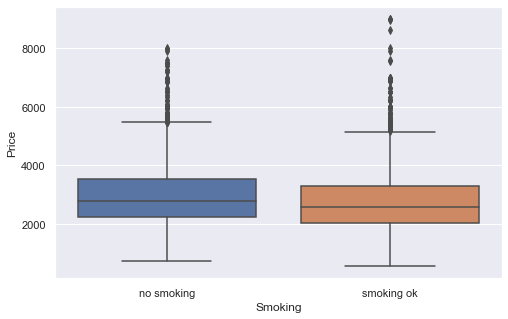

In [51]:
# boxplot smoking policy
plt.subplots(figsize = (8,5))
sns.boxplot(x = 'Smoking', y = 'Price', data = df1)

Smoking policy does not seem to affect housing prices significantly. This is again a variable where I assumed if there was no policy on the post I assumed 'no smoking'. So prices for either are similar.

In [53]:
# saving this dataset
df1.to_csv('craigslist_2.csv')

<a name="conclusion"></a>
## Conclusion

Through our EDA we found that square footage and location is the most important factors for determing price of apartments in our datasets. We were able to find the median square footage to show that San Francisco City and Pensinsula were the the most expensive areas to live in. 

San Francisco city also had a smaller number of apartments available that had more than 1 bedroom. The price in this area is so high and smaller apartments it's mostly not beneficial to live in this area for larger families. The place we do recommend is the North Bay that had the lowest median price per square foot and a 65% of postings in this area being 2 bedrooms or more.

The other variables that were collected did not seem to affect price dramatically. This may be due to how we collected the data. I had to assume some of the information for example the pet policy and smoking policy. We will try to see if we can build a model to see if we can predict price and see if we can see how important each variable was.